# BIZ 프로젝트 : 부실기업 예측 모형에 관한 연구

## Step3 : 모델링

할거 : 21,22(2개년도)년도 딥러닝 모델 구축

### 0. 라이브러리 및 데이터 불러오기

라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import Adam


폰트 지정

In [2]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False

데이터 불러오기(21 to 22 2개년도 데이터)

In [3]:
RANDOM_STATE = 110

data_21to22 = pd.read_csv("../../project/data/data_21to22.csv", encoding='utf-8-sig', low_memory=False)
print(data_21to22.shape)

(27603, 90)


### 모델링

In [5]:
# 종속 변수는 '2023/부실기업'으로 가정
y = data_21to22['2023/부실기업']
X = data_21to22.drop(columns=['2023/부실기업', '업체코드', '종목명'])

# 데이터 분할 (70:30 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam

# CNN 모델 설정
cnn_model = Sequential()
cnn_model.add(Reshape((X_train_scaled.shape[1], 1, 1), input_shape=(X_train_scaled.shape[1], 1))) # 입력층
cnn_model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')) # 1번째 hidden layer
cnn_model.add(MaxPooling2D(pool_size=(1, 1))) # 2번째 hidden layer
cnn_model.add(Dropout(0.25)) # 3번째 hidden layer
cnn_model.add(Flatten()) # 4번째 hidden layer
cnn_model.add(Dense(128, activation='relu')) # 5번째 hidden layer
cnn_model.add(Dropout(0.25)) # 6번째 hidden layer
cnn_model.add(Dense(1, activation='sigmoid')) # 출력층
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# LSTM 모델 설정
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) # 1번째 hidden layer
lstm_model.add(LSTM(128, activation='relu')) # 2번째 hidden layer
lstm_model.add(Dense(1, activation='sigmoid')) # 출력층
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# GRU 모델 설정
gru_model = Sequential()
gru_model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) # 1번째 hidden layer
gru_model.add(GRU(128, activation='relu')) # 2번째 hidden layer
gru_model.add(Dense(1, activation='sigmoid')) # 출력층
gru_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

CNN

In [20]:
# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

Epoch 1/20
484/484 [==============================] - 5s 10ms/step - loss: 0.2177 - accuracy: 0.9074 - val_loss: 0.1960 - val_accuracy: 0.9113
Epoch 2/20
484/484 [==============================] - 5s 10ms/step - loss: 0.1751 - accuracy: 0.9220 - val_loss: 0.1685 - val_accuracy: 0.9250
Epoch 3/20
484/484 [==============================] - 5s 10ms/step - loss: 0.1601 - accuracy: 0.9279 - val_loss: 0.1654 - val_accuracy: 0.9257
Epoch 4/20
484/484 [==============================] - 5s 10ms/step - loss: 0.1549 - accuracy: 0.9316 - val_loss: 0.1644 - val_accuracy: 0.9260
Epoch 5/20
484/484 [==============================] - 4s 9ms/step - loss: 0.1448 - accuracy: 0.9350 - val_loss: 0.1553 - val_accuracy: 0.9325
Epoch 6/20
484/484 [==============================] - 5s 9ms/step - loss: 0.1398 - accuracy: 0.9367 - val_loss: 0.1587 - val_accuracy: 0.9276
Epoch 7/20
484/484 [==============================] - 5s 10ms/step - loss: 0.1354 - accuracy: 0.9403 - val_loss: 0.1548 - val_accuracy: 0.9309
E

LSTM

In [21]:
# LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)[1]
print(f"LSTM Accuracy: {lstm_accuracy}")

Epoch 1/20
484/484 [==============================] - 54s 107ms/step - loss: 10544.5850 - accuracy: 0.8131 - val_loss: 0.5628 - val_accuracy: 0.8173
Epoch 2/20
484/484 [==============================] - 53s 110ms/step - loss: 0.5335 - accuracy: 0.8135 - val_loss: 0.5090 - val_accuracy: 0.8173
Epoch 3/20
484/484 [==============================] - 52s 108ms/step - loss: 0.5010 - accuracy: 0.8135 - val_loss: 0.4881 - val_accuracy: 0.8173
Epoch 4/20
484/484 [==============================] - 53s 109ms/step - loss: 0.4883 - accuracy: 0.8135 - val_loss: 0.4802 - val_accuracy: 0.8173
Epoch 5/20
484/484 [==============================] - 53s 109ms/step - loss: 0.4838 - accuracy: 0.8135 - val_loss: 0.4773 - val_accuracy: 0.8173
Epoch 6/20
484/484 [==============================] - 53s 109ms/step - loss: 0.4825 - accuracy: 0.8135 - val_loss: 0.4765 - val_accuracy: 0.8173
Epoch 7/20
484/484 [==============================] - 52s 108ms/step - loss: 0.4821 - accuracy: 0.8135 - val_loss: 0.4762 - va

GRU

In [22]:
# GRU 학습 및 평가
gru_history = gru_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)
gru_accuracy = gru_model.evaluate(X_test_lstm, y_test)[1]
print(f"GRU Accuracy: {gru_accuracy}")

Epoch 1/20
484/484 [==============================] - 61s 119ms/step - loss: 0.3709 - accuracy: 0.8459 - val_loss: 0.3065 - val_accuracy: 0.8660
Epoch 2/20
484/484 [==============================] - 63s 130ms/step - loss: 0.3285 - accuracy: 0.8615 - val_loss: 0.3384 - val_accuracy: 0.8585
Epoch 3/20
484/484 [==============================] - 63s 130ms/step - loss: 0.2631 - accuracy: 0.8841 - val_loss: 0.2475 - val_accuracy: 0.8864
Epoch 4/20
484/484 [==============================] - 63s 131ms/step - loss: 0.2317 - accuracy: 0.8965 - val_loss: 0.2586 - val_accuracy: 0.8841
Epoch 5/20
484/484 [==============================] - 63s 131ms/step - loss: 0.2218 - accuracy: 0.8999 - val_loss: 0.2462 - val_accuracy: 0.8815
Epoch 6/20
484/484 [==============================] - 60s 123ms/step - loss: 0.2057 - accuracy: 0.9081 - val_loss: 0.2084 - val_accuracy: 0.8988
Epoch 7/20
484/484 [==============================] - 45s 93ms/step - loss: 0.1881 - accuracy: 0.9167 - val_loss: 0.1830 - val_acc

CNN, LSTM, GRU 에폭별 정확도 시각화

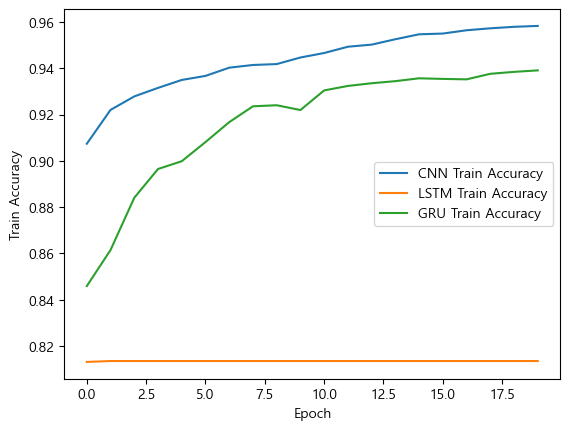

In [23]:
# 정확도 시각화
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

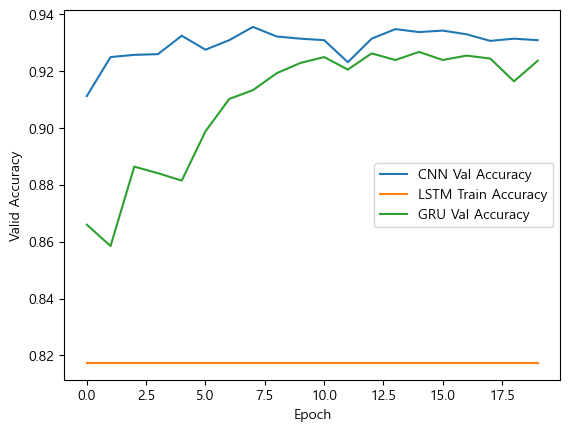

In [24]:
# 정확도 시각화
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Valid Accuracy')
plt.legend()
plt.show()

---

노드수 조절(64)

259/259 [==============================] - 1s 3ms/step - loss: 0.1524 - accuracy: 0.9395
CNN Accuracy (64 nodes): 0.9395000338554382
259/259 [==============================] - 7s 26ms/step - loss: 0.3068 - accuracy: 0.8680
LSTM Accuracy (64 nodes): 0.8680111169815063
259/259 [==============================] - 5s 20ms/step - loss: 0.1646 - accuracy: 0.9344
GRU Accuracy (64 nodes): 0.9344282150268555


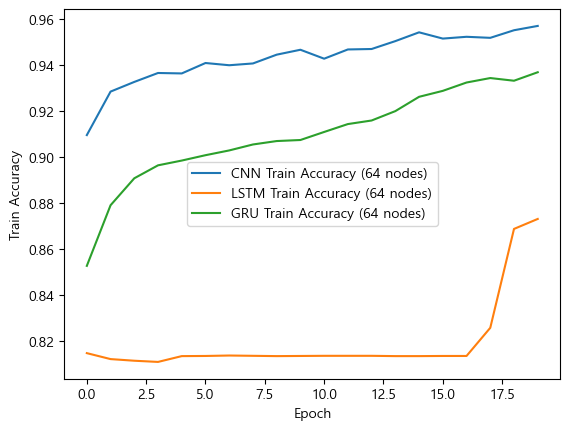

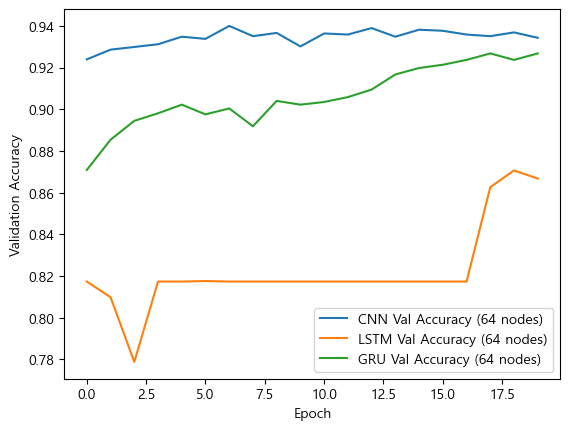

In [ ]:
# 세트 1: 노드 수 64
# CNN 모델 설정
cnn_model_64 = Sequential()
cnn_model_64.add(Reshape((X_train_scaled.shape[1], 1, 1), input_shape=(X_train_scaled.shape[1], 1))) 
cnn_model_64.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')) 
cnn_model_64.add(MaxPooling2D(pool_size=(1, 1))) 
cnn_model_64.add(Dropout(0.3)) 
cnn_model_64.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')) 
cnn_model_64.add(MaxPooling2D(pool_size=(1, 1))) 
cnn_model_64.add(Dropout(0.3)) 
cnn_model_64.add(Flatten()) 
cnn_model_64.add(Dense(64, activation='relu')) 
cnn_model_64.add(Dropout(0.3)) 
cnn_model_64.add(Dense(1, activation='sigmoid')) 
cnn_model_64.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# LSTM 모델 설정
lstm_model_64 = Sequential()
lstm_model_64.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) 
lstm_model_64.add(LSTM(64, activation='relu', return_sequences=True)) 
lstm_model_64.add(LSTM(64, activation='relu')) 
lstm_model_64.add(Dense(1, activation='sigmoid')) 
lstm_model_64.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# GRU 모델 설정
gru_model_64 = Sequential()
gru_model_64.add(GRU(64, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) 
gru_model_64.add(GRU(64, activation='relu', return_sequences=True)) 
gru_model_64.add(GRU(64, activation='relu')) 
gru_model_64.add(Dense(1, activation='sigmoid')) 
gru_model_64.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))
cnn_history_64 = cnn_model_64.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
cnn_accuracy_64 = cnn_model_64.evaluate(X_test_cnn, y_test)[1]
print(f"CNN Accuracy (64 nodes): {cnn_accuracy_64}")

# LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_history_64 = lstm_model_64.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
lstm_accuracy_64 = lstm_model_64.evaluate(X_test_lstm, y_test)[1]
print(f"LSTM Accuracy (64 nodes): {lstm_accuracy_64}")

# GRU 학습 및 평가
gru_history_64 = gru_model_64.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
gru_accuracy_64 = gru_model_64.evaluate(X_test_lstm, y_test)[1]
print(f"GRU Accuracy (64 nodes): {gru_accuracy_64}")

# 정확도 시각화
plt.plot(cnn_history_64.history['accuracy'], label='CNN Train Accuracy (64 nodes)')
plt.plot(lstm_history_64.history['accuracy'], label='LSTM Train Accuracy (64 nodes)')
plt.plot(gru_history_64.history['accuracy'], label='GRU Train Accuracy (64 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

plt.plot(cnn_history_64.history['val_accuracy'], label='CNN Val Accuracy (64 nodes)')
plt.plot(lstm_history_64.history['val_accuracy'], label='LSTM Val Accuracy (64 nodes)')
plt.plot(gru_history_64.history['val_accuracy'], label='GRU Val Accuracy (64 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

노드수 조절(128)

259/259 [==============================] - 2s 6ms/step - loss: 0.1798 - accuracy: 0.9367
CNN Accuracy (128 nodes): 0.9367226362228394
259/259 [==============================] - 16s 63ms/step - loss: 0.4707 - accuracy: 0.8139
LSTM Accuracy (128 nodes): 0.8139113783836365
259/259 [==============================] - 12s 47ms/step - loss: 0.1825 - accuracy: 0.9308
GRU Accuracy (128 nodes): 0.9308054447174072


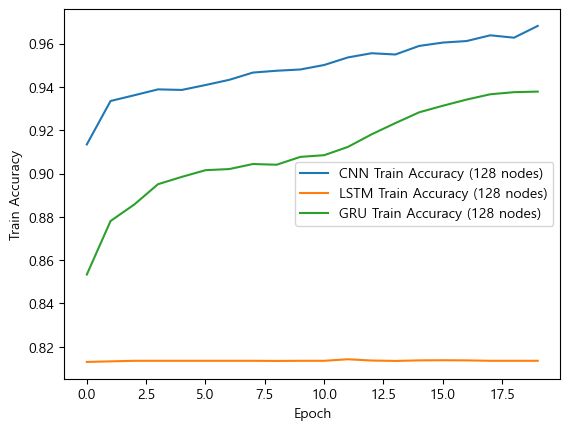

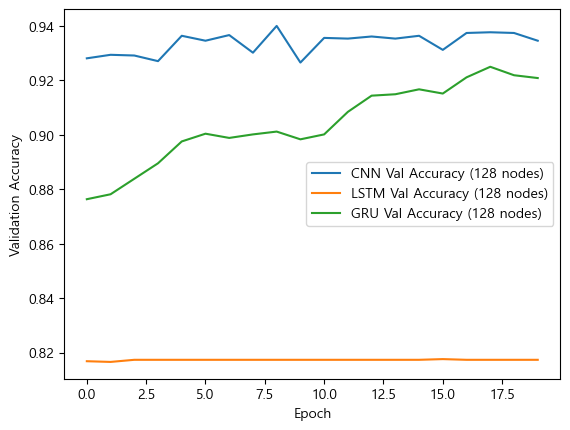

In [6]:
# 세트 2: 노드 수 128
# CNN 모델 설정
cnn_model_128 = Sequential()
cnn_model_128.add(Reshape((X_train_scaled.shape[1], 1, 1), input_shape=(X_train_scaled.shape[1], 1))) 
cnn_model_128.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same')) 
cnn_model_128.add(MaxPooling2D(pool_size=(1, 1))) 
cnn_model_128.add(Dropout(0.3)) 
cnn_model_128.add(Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same')) 
cnn_model_128.add(MaxPooling2D(pool_size=(1, 1))) 
cnn_model_128.add(Dropout(0.3)) 
cnn_model_128.add(Flatten()) 
cnn_model_128.add(Dense(128, activation='relu')) 
cnn_model_128.add(Dropout(0.3)) 
cnn_model_128.add(Dense(1, activation='sigmoid')) 
cnn_model_128.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# LSTM 모델 설정
lstm_model_128 = Sequential()
lstm_model_128.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) 
lstm_model_128.add(LSTM(128, activation='relu', return_sequences=True)) 
lstm_model_128.add(LSTM(128, activation='relu')) 
lstm_model_128.add(Dense(1, activation='sigmoid')) 
lstm_model_128.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# GRU 모델 설정
gru_model_128 = Sequential()
gru_model_128.add(GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) 
gru_model_128.add(GRU(128, activation='relu', return_sequences=True)) 
gru_model_128.add(GRU(128, activation='relu')) 
gru_model_128.add(Dense(1, activation='sigmoid')) 
gru_model_128.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))
cnn_history_128 = cnn_model_128.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
cnn_accuracy_128 = cnn_model_128.evaluate(X_test_cnn, y_test)[1]
print(f"CNN Accuracy (128 nodes): {cnn_accuracy_128}")

# LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_history_128 = lstm_model_128.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
lstm_accuracy_128 = lstm_model_128.evaluate(X_test_lstm, y_test)[1]
print(f"LSTM Accuracy (128 nodes): {lstm_accuracy_128}")

# GRU 학습 및 평가
gru_history_128 = gru_model_128.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
gru_accuracy_128 = gru_model_128.evaluate(X_test_lstm, y_test)[1]
print(f"GRU Accuracy (128 nodes): {gru_accuracy_128}")

# 정확도 시각화
plt.plot(cnn_history_128.history['accuracy'], label='CNN Train Accuracy (128 nodes)')
plt.plot(lstm_history_128.history['accuracy'], label='LSTM Train Accuracy (128 nodes)')
plt.plot(gru_history_128.history['accuracy'], label='GRU Train Accuracy (128 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

plt.plot(cnn_history_128.history['val_accuracy'], label='CNN Val Accuracy (128 nodes)')
plt.plot(lstm_history_128.history['val_accuracy'], label='LSTM Val Accuracy (128 nodes)')
plt.plot(gru_history_128.history['val_accuracy'], label='GRU Val Accuracy (128 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

노드수 조절(256)

259/259 [==============================] - 3s 10ms/step - loss: 0.2183 - accuracy: 0.9359
CNN Accuracy (256 nodes): 0.9358773231506348
259/259 [==============================] - 51s 198ms/step - loss: nan - accuracy: 0.8139
LSTM Accuracy (256 nodes): 0.8139113783836365
259/259 [==============================] - 25s 96ms/step - loss: 0.3337 - accuracy: 0.8590
GRU Accuracy (256 nodes): 0.8589542508125305


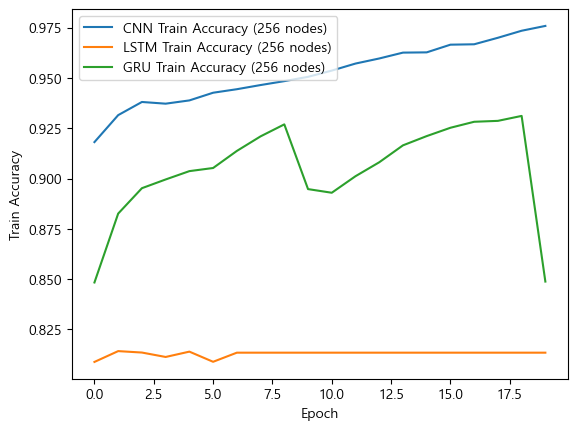

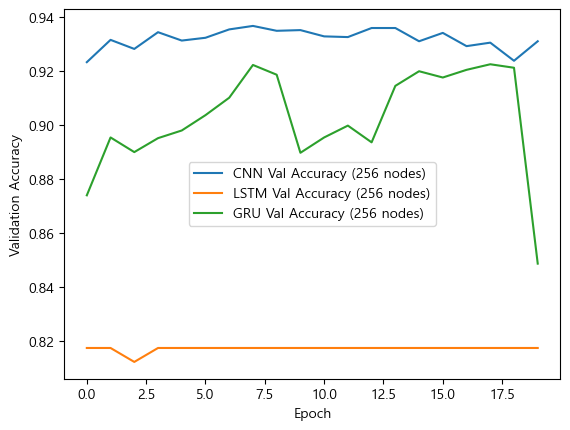

In [5]:
# 세트 3: 노드 수 256
# CNN 모델 설정
cnn_model_256 = Sequential()
cnn_model_256.add(Reshape((X_train_scaled.shape[1], 1, 1), input_shape=(X_train_scaled.shape[1], 1))) 
cnn_model_256.add(Conv2D(256, kernel_size=(2, 2), activation='relu', padding='same')) 
cnn_model_256.add(MaxPooling2D(pool_size=(1, 1))) 
cnn_model_256.add(Dropout(0.3)) 
cnn_model_256.add(Conv2D(256, kernel_size=(2, 2), activation='relu', padding='same')) 
cnn_model_256.add(MaxPooling2D(pool_size=(1, 1))) 
cnn_model_256.add(Dropout(0.3)) 
cnn_model_256.add(Flatten()) 
cnn_model_256.add(Dense(256, activation='relu')) 
cnn_model_256.add(Dropout(0.3)) 
cnn_model_256.add(Dense(1, activation='sigmoid')) 
cnn_model_256.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# LSTM 모델 설정
lstm_model_256 = Sequential()
lstm_model_256.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) 
lstm_model_256.add(LSTM(256, activation='relu', return_sequences=True)) 
lstm_model_256.add(LSTM(256, activation='relu')) 
lstm_model_256.add(Dense(1, activation='sigmoid')) 
lstm_model_256.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# GRU 모델 설정
gru_model_256 = Sequential()
gru_model_256.add(GRU(256, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) 
gru_model_256.add(GRU(256, activation='relu', return_sequences=True)) 
gru_model_256.add(GRU(256, activation='relu')) 
gru_model_256.add(Dense(1, activation='sigmoid')) 
gru_model_256.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))
cnn_history_256 = cnn_model_256.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
cnn_accuracy_256 = cnn_model_256.evaluate(X_test_cnn, y_test)[1]
print(f"CNN Accuracy (256 nodes): {cnn_accuracy_256}")

# LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_history_256 = lstm_model_256.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
lstm_accuracy_256 = lstm_model_256.evaluate(X_test_lstm, y_test)[1]
print(f"LSTM Accuracy (256 nodes): {lstm_accuracy_256}")

# GRU 학습 및 평가
gru_history_256 = gru_model_256.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
gru_accuracy_256 = gru_model_256.evaluate(X_test_lstm, y_test)[1]
print(f"GRU Accuracy (256 nodes): {gru_accuracy_256}")

# 정확도 시각화
plt.plot(cnn_history_256.history['accuracy'], label='CNN Train Accuracy (256 nodes)')
plt.plot(lstm_history_256.history['accuracy'], label='LSTM Train Accuracy (256 nodes)')
plt.plot(gru_history_256.history['accuracy'], label='GRU Train Accuracy (256 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

plt.plot(cnn_history_256.history['val_accuracy'], label='CNN Val Accuracy (256 nodes)')
plt.plot(lstm_history_256.history['val_accuracy'], label='LSTM Val Accuracy (256 nodes)')
plt.plot(gru_history_256.history['val_accuracy'], label='GRU Val Accuracy (256 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

3개의 모델 (64, 128, 256) -> 9개 모델 시각화

In [ ]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.figure(figsize=(14, 6))

# Train Accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history_64.history['accuracy'], label='CNN Train Accuracy (64 nodes)')
plt.plot(lstm_history_64.history['accuracy'], label='LSTM Train Accuracy (64 nodes)')
plt.plot(gru_history_64.history['accuracy'], label='GRU Train Accuracy (64 nodes)')
plt.plot(cnn_history_128.history['accuracy'], label='CNN Train Accuracy (128 nodes)')
plt.plot(lstm_history_128.history['accuracy'], label='LSTM Train Accuracy (128 nodes)')
plt.plot(gru_history_128.history['accuracy'], label='GRU Train Accuracy (128 nodes)')
plt.plot(cnn_history_256.history['accuracy'], label='CNN Train Accuracy (256 nodes)')
plt.plot(lstm_history_256.history['accuracy'], label='LSTM Train Accuracy (256 nodes)')
plt.plot(gru_history_256.history['accuracy'], label='GRU Train Accuracy (256 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy for All Models')
plt.legend()
plt.grid()

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history_64.history['val_accuracy'], label='CNN Val Accuracy (64 nodes)')
plt.plot(lstm_history_64.history['val_accuracy'], label='LSTM Val Accuracy (64 nodes)')
plt.plot(gru_history_64.history['val_accuracy'], label='GRU Val Accuracy (64 nodes)')
plt.plot(cnn_history_128.history['val_accuracy'], label='CNN Val Accuracy (128 nodes)')
plt.plot(lstm_history_128.history['val_accuracy'], label='LSTM Val Accuracy (128 nodes)')
plt.plot(gru_history_128.history['val_accuracy'], label='GRU Val Accuracy (128 nodes)')
plt.plot(cnn_history_256.history['val_accuracy'], label='CNN Val Accuracy (256 nodes)')
plt.plot(lstm_history_256.history['val_accuracy'], label='LSTM Val Accuracy (256 nodes)')
plt.plot(gru_history_256.history['val_accuracy'], label='GRU Val Accuracy (256 nodes)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for All Models')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

.